In [1]:
import os
os.chdir('../..')

In [2]:
'''creat list of neighborhoods in LA city'''
from src.geoadmin import load_neighborhoods, load_cities

import geopandas as gpd

cities = load_cities().to_crs(4326)
hoods = load_neighborhoods()

assert hoods.crs == cities.crs, "CRS mismatch between neighborhoods and cities data"

lacity = cities.query('CITYNAME_ALF == "LOS ANGELES"')
hoodnames = gpd.sjoin(hoods.set_geometry(hoods.centroid.to_crs(epsg=4326)).set_crs(4326),
                         lacity[['geometry']],
                         predicate='intersects'
                         )['name'].tolist()
print(f'Found {len(hoodnames)} neighborhoods in LA city')

lacity_hoods = hoods[hoods['name'].isin(hoodnames)]

Found 122 neighborhoods in LA city


/var/folders/7b/rl6lkdns1dbfv_n3wwwmq8580000gn/T/ipykernel_71853/2954897241.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hoodnames = gpd.sjoin(hoods.set_geometry(hoods.centroid.to_crs(epsg=4326)).set_crs(4326),


In [3]:
landbase_years = [2013, 2017, 2021]  # get_landbase_layer to see what years are available
adp_years      = [2014, 2017, 2020]
lariac_years   = [2014, 2017, 2020]

region_gdf = lacity_hoods.iloc[[0]]

apd_data = []
for lb_yr, apd_yr, lar_yr in zip(landbase_years, adp_years, lariac_years):
    print(f'Processing year triplet: {lb_yr}, {apd_yr}, {lar_yr}')

    from src.geoadmin import load_data_by_year
    landbase_parcels, assessor_data, lariac_structures = load_data_by_year(
        region_gdf, lb_yr, apd_yr, lar_yr, "lariac"
        )
    print('Join assessor data with parcels polygons ')
    from src.geoadmin import merge_assessor_landbase
    apd = merge_assessor_landbase(assessor_data, landbase_parcels)
    print('Extract building-level features')

    from src.geoadmin import get_bfp_at_parcel
    data = get_bfp_at_parcel(lariac_structures, apd, CRS = apd.crs)
    apd_data.append(data)


Processing year triplet: 2013, 2014, 2014


/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/geopandas/io/file.py:521: UserWarning: More than one layer found in 'LARIAC4_Buildings_2014.gdb': 'LARIAC4_BUILDINGS_2014' (default), 'LARIAC2_BUILDINGS_DELETED_2014'. Specify layer parameter to avoid this warning.
  crs = pyogrio.read_info(path_or_bytes, layer=kwargs.get("layer")).get("crs")
/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer found in 'LARIAC4_Buildings_2014.gdb': 'LARIAC4_BUILDINGS_2014' (default), 'LARIAC2_BUILDINGS_DELETED_2014'. Specify layer parameter to avoid this warning.
  result = read_func(


Join assessor data with parcels polygons 
Extract building-level features


3488it [00:01, 1942.37it/s]
/Users/adamswietek/Documents/PostDoc/HiddenHousing/src/metrics.py:192: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  out['geometry'] = data.iloc[pt_index].groupby(poly_index)['geometry'].apply(lambda x: x.unary_union)


(1917, 9) (1917, 55)
Processing year triplet: 2017, 2017, 2017


/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/pyogrio/core.py:279: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiPolygon' is converted to 'MultiPolygon Z'
  return ogr_read_info(
/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/geopandas/io/file.py:521: UserWarning: More than one layer found in 'LARIAC5_Buildings_2017.gdb': 'LARIAC5_BUILDINGS_2017' (default), 'LARIAC4_BUILDINGS_DELETED_2017'. Specify layer parameter to avoid this warning.
  crs = pyogrio.read_info(path_or_bytes, layer=kwargs.get("layer")).get("crs")
/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiPolygon' is converted to 'MultiPolygon Z'
  return ogr_read(
/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer

Join assessor data with parcels polygons 
Extract building-level features


3467it [00:01, 2508.36it/s]
/Users/adamswietek/Documents/PostDoc/HiddenHousing/src/metrics.py:192: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  out['geometry'] = data.iloc[pt_index].groupby(poly_index)['geometry'].apply(lambda x: x.unary_union)


(1916, 9) (1916, 55)
Processing year triplet: 2021, 2020, 2020


/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/pyogrio/core.py:279: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiPolygon' is converted to 'MultiPolygon Z'
  return ogr_read_info(
/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/geopandas/io/file.py:521: UserWarning: More than one layer found in 'LARIAC6_Buildings_2020.gdb': 'LARIAC6_BUILDINGS_2020' (default), 'LARIAC5_BUILDINGS_DELETED_2020'. Specify layer parameter to avoid this warning.
  crs = pyogrio.read_info(path_or_bytes, layer=kwargs.get("layer")).get("crs")
/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiPolygon' is converted to 'MultiPolygon Z'
  return ogr_read(
/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer

Join assessor data with parcels polygons 
Extract building-level features


3439it [00:01, 2603.43it/s]


(1914, 9) (1914, 55)


/Users/adamswietek/Documents/PostDoc/HiddenHousing/src/metrics.py:192: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  out['geometry'] = data.iloc[pt_index].groupby(poly_index)['geometry'].apply(lambda x: x.unary_union)


In [4]:
data.columns

Index(['AIN', 'shape.area.sum', 'shape.volume.sum', 'shape.floorarea.sum',
       'shape.area.max', 'shape.volume.max', 'shape.floorarea.max',
       'shape.n_buildings', 'geometry', 'parcels.area', 'parcels.far',
       'parcels.n_buildings', 'parcels.SQFTmain', 'parcels.unitcount',
       'parcels.bathcount', 'parcels.bdrmcount', 'sp.bar', 'sp.far',
       'sp.resid.floorarea', 'sp.resid.area', 'sp.ratio.floorarea', 'ZIPcode',
       'TaxRateArea_CITY', 'AIN', 'RollYear', 'TaxRateArea', 'AssessorID',
       'PropertyLocation', 'PropertyType', 'PropertyUseCode', 'GeneralUseType',
       'SpecificUseType', 'SpecificUseDetail1', 'SpecificUseDetail2',
       'totBuildingDataLines', 'YearBuilt', 'EffectiveYearBuilt', 'SQFTmain',
       'Bedrooms', 'Bathrooms', 'Units', 'RecordingDate', 'LandValue',
       'LandBaseYear', 'ImprovementValue', 'ImpBaseYear', 'TotalLandImpValue',
       'HomeownersExemption', 'RealEstateExemption', 'FixtureValue',
       'FixtureExemption', 'PersonalPropertyV

In [ ]:
# Parallel version over (neighborhood, year triplet)
from tqdm.auto import tqdm
from joblib import Parallel, delayed
import pandas as pd

def process_one(neighborhood_name, lb_yr, apd_yr, lar_yr):
    neighborhood = lacity_hoods.query('name == @neighborhood_name')

    from src.geoadmin import load_data_by_year
    landbase_parcels, assessor_data, lariac_structures = load_data_by_year(
        neighborhood, lb_yr, apd_yr, lar_yr, 'lariac'
    )

    from src.geoadmin import merge_assessor_landbase
    apd = merge_assessor_landbase(assessor_data, landbase_parcels)

    from src.geoadmin import get_bfp_at_parcel
    data = get_bfp_at_parcel(lariac_structures, apd, CRS=apd.crs)

    # data['RollYear'] = apd_yr
    data['Neighborhood'] = neighborhood_name
    # data['LandbaseYear'] = lb_yr
    # data['LariacYear'] = lar_yr
    return data

year_triples = list(zip(landbase_years, adp_years, lariac_years))
neighborhoods = list(lacity_hoods['name'])#[:5]  # limit to first 5 neighborhoods for testing

tasks = [
    (nh, lb_yr, apd_yr, lar_yr)
    for (lb_yr, apd_yr, lar_yr) in year_triples
    for nh in neighborhoods
]

n_jobs = -1
prefer = 'processes'

apd_data = Parallel(n_jobs=n_jobs, prefer=prefer)(
    delayed(process_one)(nh, lb_yr, apd_yr, lar_yr)
    for (nh, lb_yr, apd_yr, lar_yr) in tqdm(
        tasks,
        desc='Processing (year, neighborhood) tasks',
        total=len(tasks),
    )
)

data = pd.concat(apd_data, ignore_index=True)


Processing (year, neighborhood) tasks:   0%|          | 0/366 [00:00<?, ?it/s]

Traceback (most recent call last):
  File "/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "REGISTER","rtype":"folder","base64_name" for automatic cleanup: unknown resource type ("L3Zhci9mb2xkZXJzLzdiL3JsNmxrZG5zMWRiZnZfbjN3d3dtcTg1ODAwMDBnbi9UL2pvYmxpYl9tZW1tYXBwaW5nX2ZvbGRlcl83MTg1M184ZDVkZGJiY2VhNGM0MThmODE5NTE3M2VhMWIxY2ViMF84NGY1Yjk2ZWUzOTk0ZmM0YmE1NGFjMjk3YzY3NGQ0Mg=="}). Resource type should be one of the following: ['noop', 'folder', 'file', 'semlock']
Traceback (most recent call last):
  File "/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "REGISTER","rtype":"folder","base64_name" for automatic cleanup: unknown resource type ("L3Zhci9mb2x

In [ ]:
data = pd.concat(apd_data, ignore_index=True)

data = data.loc[:, ~data.columns.duplicated()]

# rename for clarity
data = data.rename(columns={
    "geometry": "geom_bfp",
    "geometry_x": "geom_point",
    "geometry_y": "geom_parcel",
})

data = data.set_geometry("geom_parcel")

data["geom_bfp_wkt"] = data["geom_bfp"].to_wkt()
data["geom_point_wkt"] = data["geom_point"].to_wkt()
data = data.drop(columns=["geom_bfp", "geom_point"])

# optional: keep all three geometry columns when saving
data.to_file('data/04_results/lacity_apd_building_features.gpkg', driver="GPKG")


Traceback (most recent call last):
  File "/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "UNREGISTER","rtype":"semlock","base64_name" for automatic cleanup: unknown resource type ("L2xva3ktNzE4NTMta3FhcGFjOWQ="}). Resource type should be one of the following: ['noop', 'folder', 'file', 'semlock']
/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/pyogrio/geopandas.py:710: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


Traceback (most recent call last):
  File "/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "UNREGISTER","rtype":"semlock","base64_name" for automatic cleanup: unknown resource type ("L2xva3ktNzE4NTMtaF9kODRydmY="}). Resource type should be one of the following: ['noop', 'folder', 'file', 'semlock']
Traceback (most recent call last):
  File "/Users/adamswietek/opt/anaconda3/envs/samgeo/lib/python3.13/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "UNREGISTER","rtype":"semlock","base64_name" for automatic cleanup: unknown resource type ("L2xva3ktNzE4NTMtcmI0dGZmNWE="}). Resource type should be one of the following: ['noop', 'folder', 'file', 'semlock']
Traceback (most recent call last):
  File "/Users/adamsw

In [32]:
import pandas as pd
data = pd.concat(apd_data, ignore_index=True)

In [52]:
data.groupby(['Neighborhood','RollYear']).size().unstack()

RollYear,2014,2017,2020
Neighborhood,,,
Adams-Normandie,2018,2016,2012
Arleta,6850,6850,6853
Arlington Heights,2313,2309,2300
Atwater Village,3578,3582,3592
Vermont-Slauson,4793,4787,4782


In [63]:
data[data.geometry.isnull()]['AIN']

,AIN,AIN
1917,NaN,NaN
1918,NaN,5.040001e+09
1919,NaN,5.040001e+09
1920,NaN,5.040002e+09
1921,NaN,NaN
...,...,...
58630,NaN,6.014020e+09
58631,NaN,6.014028e+09
58632,NaN,6.014028e+09
58633,NaN,6.014035e+09


In [55]:
(data
.query('Neighborhood == "Adams-Normandie" & RollYear == 2017')
.plot('FAR', scheme = 'naturalbreaks', cmap = 'OrRd', legend = True)
)

TypeError: dtype 'AIN    float64
AIN    float64
dtype: object' not understood

(None, None)

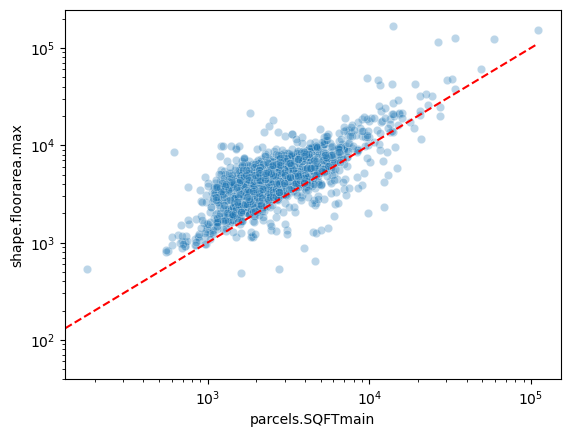

In [ ]:
import seaborn as sns

sns.scatterplot(data = data, 
                x = 'parcels.SQFTmain', 
                y = 'shape.floorarea.max', 
                alpha = 0.3)

#add 45 degree line
import matplotlib.pyplot as plt
plt.plot([0, data['parcels.SQFTmain'].max()], 
[0, data['parcels.SQFTmain'].max()], color = 'red', linestyle ='--')

plt.xscale('log'), plt.yscale('log')



<Axes: ylabel='Frequency'>

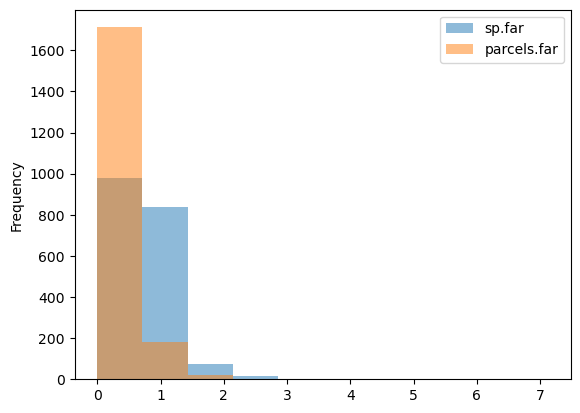

In [9]:
data[['sp.far','parcels.far']].plot.hist(alpha =.5)